In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

## Goals: Trying to predict whether we can create a model to usefully target the customers that would stop using the company´s services/products (churn) .

In [3]:
df=pd.read_csv('customer_churn.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.columns=df.columns.str.lower()

In [6]:
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [8]:
# Grouping the features into a dataframe 
df2 = df[['tenure', 'seniorcitizen', 'monthlycharges']]

In [9]:
df2.isna().sum()

tenure            0
seniorcitizen     0
monthlycharges    0
dtype: int64

### X-y | Split

In [10]:
y = df['churn']
X = df2  # the 3 columns used as festures we just assigned to df2

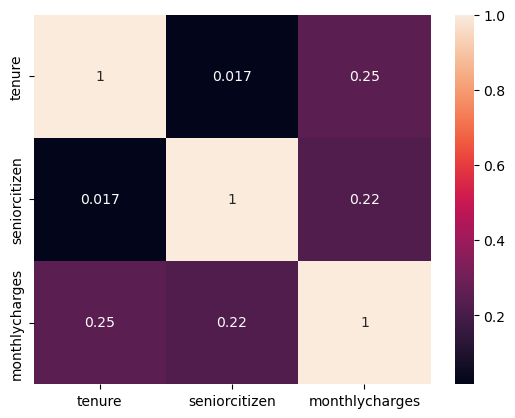

In [11]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

##### Not much multicoliniarity

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [15]:
# Normalizing both TRAIN sets
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)

X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
#X_train_scaled.head()


In [16]:
# Reseting indexes for both LABEL sets
y_train = y_train.reset_index(drop=True) 

y_test = y_test.reset_index(drop=True) 


In [17]:
from sklearn.preprocessing import LabelEncoder
# Tranforming the sets of Labels into 0 and 1s so we can check the scores
le = LabelEncoder()
y_train_labeled = le.fit_transform(y_train)

y_test_labeled = le.fit_transform(y_test)
#y_test_labeled

In [18]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train_labeled)

LogisticRegression(random_state=0)

In [19]:
LR.predict_proba(X_train_scaled)

array([[0.78415021, 0.21584979],
       [0.98340335, 0.01659665],
       [0.72637044, 0.27362956],
       ...,
       [0.91040106, 0.08959894],
       [0.98801263, 0.01198737],
       [0.76551427, 0.23448573]])

In [20]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)

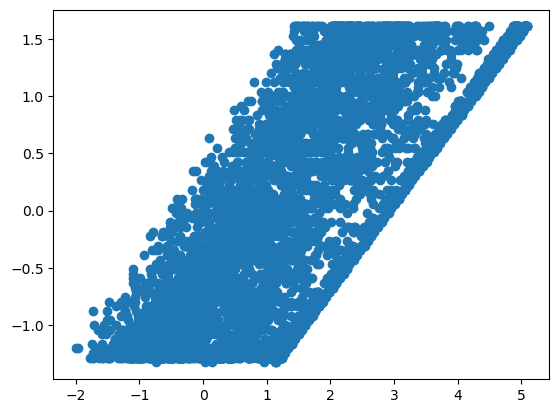

In [21]:
plt.scatter(logits,X_train_scaled['tenure'])

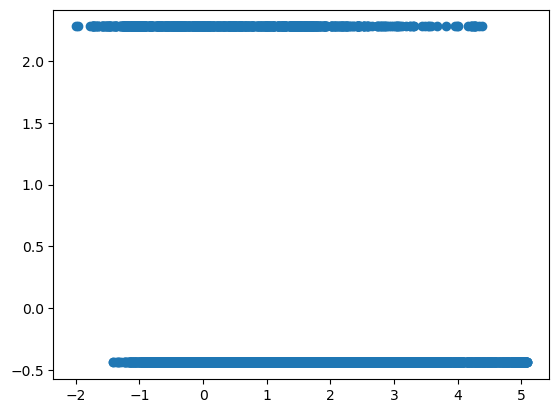

In [22]:
plt.scatter(logits,X_train_scaled['seniorcitizen'])

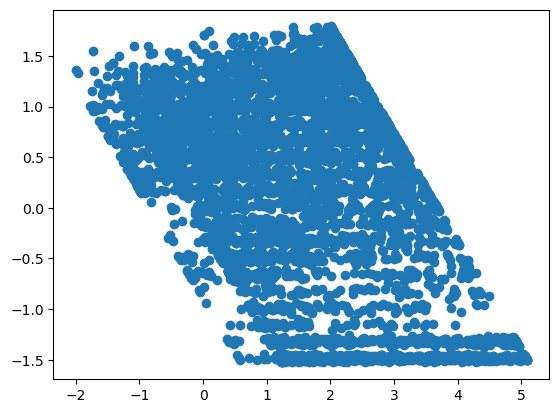

In [23]:
plt.scatter(logits,X_train_scaled['monthlycharges'])

<AxesSubplot:>

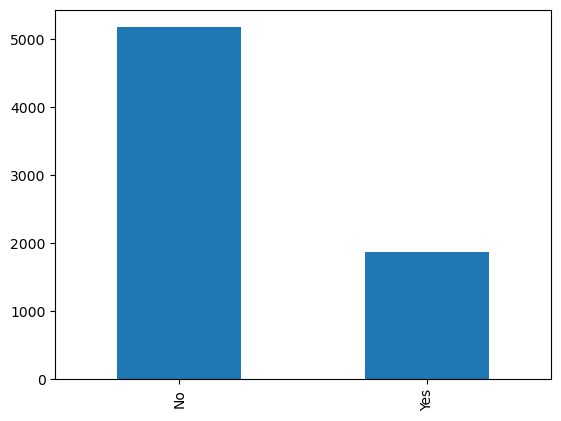

In [24]:
count_classes = df['churn'].value_counts()
count_classes
count_classes.plot(kind = 'bar')

### The data and plots show the dataframe has features that would match logistic regression model and our label is umbalanced.

In [25]:
# applying model and checking score
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train_labeled)
LR.score(X_test_scaled, y_test_labeled)

0.7984386089425124

In [26]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [27]:
#Checking other scores
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test_labeled,pred))
print("recall: ",recall_score(y_test_labeled,pred))
print("f1: ",f1_score(y_test_labeled,pred))


precision:  0.6210526315789474
recall:  0.5014164305949008
f1:  0.554858934169279


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_labeled,pred)

array([[948, 108],
       [176, 177]], dtype=int64)

##### Even though accuracy is above 70%, we have very bad  precision and recall scores due to the nature of umbalanced data. Therefore we need resizing.

## Oversampling

In [29]:
from sklearn.utils import resample

In [30]:
train = pd.concat([X_train_scaled, y_train],axis=1)
train

,tenure,seniorcitizen,monthlycharges,churn
0,1.362625,2.279917,1.520033,No
1,0.873982,-0.438613,-1.481589,No
2,0.670381,2.279917,0.865345,Yes
3,-1.284191,-0.438613,0.159276,Yes
4,1.444066,-0.438613,1.203463,No
...,...,...,...,...
5629,0.466780,2.279917,0.676397,No
5630,-0.306905,-0.438613,1.176944,Yes
5631,1.159024,-0.438613,0.810650,No
5632,1.118304,-0.438613,-1.484904,No


In [31]:
train['churn'] = train['churn'].replace({'No': 0, 'Yes': 1})

In [32]:
no_churn = train[train['churn']==0]
yes_churn = train[train['churn']==1]

In [33]:
display(no_churn.shape)
display(yes_churn.shape)

(4118, 4)

(1516, 4)

In [34]:
# oversample minority
yes_churn_oversampled = resample(yes_churn, 
                                    replace=True, 
                                    n_samples = len(no_churn),
                                    random_state=0)

In [35]:
display(no_churn.shape)
display(yes_churn_oversampled.shape)
yes_churn_oversampled.head(20)

(4118, 4)

(4118, 4)

,tenure,seniorcitizen,monthlycharges,churn
2622,-1.202751,-0.438613,0.886892,1
2200,-0.062584,-0.438613,-0.314752,1
4511,-1.039870,-0.438613,1.104016,1
3218,-0.999150,-0.438613,-1.136841,1
2946,1.362625,2.279917,1.529978,1
5148,-0.714108,-0.438613,0.775843,1
3884,-1.284191,-0.438613,0.494079,1
1052,-0.958429,-0.438613,0.994625,1
2341,-1.162031,-0.438613,1.175286,1
4122,-0.795548,-0.438613,0.533857,1


In [36]:
train_oversampled = pd.concat([no_churn,yes_churn_oversampled],axis=0)
train_oversampled.head()

,tenure,seniorcitizen,monthlycharges,churn
0,1.362625,2.279917,1.520033,0
1,0.873982,-0.438613,-1.481589,0
4,1.444066,-0.438613,1.203463,0
5,1.321905,2.279917,1.312854,0
7,0.711101,-0.438613,1.299594,0


In [37]:
y_train_over = train_oversampled['churn'].copy()
X_train_over = train_oversampled.drop('churn',axis = 1).copy()

In [38]:
LR_over = LogisticRegression(random_state=0, solver='lbfgs')
LR_over.fit(X_train_over, y_train_over)
pred = LR_over.predict(X_test_scaled)

In [39]:
pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
confusion_matrix(y_test_labeled,pred)

array([[739, 317],
       [ 85, 268]], dtype=int64)

In [41]:
print("precision: ",precision_score(y_test_labeled,pred))
print("recall: ",recall_score(y_test_labeled,pred))
print("f1: ",f1_score(y_test_labeled,pred))

precision:  0.4581196581196581
recall:  0.7592067988668555
f1:  0.5714285714285714


### Trying SMOTE

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train_labeled)

In [44]:
X_train_SMOTE.shape

(8236, 3)

In [45]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

In [46]:
confusion_matrix(y_test_labeled,pred)

array([[738, 318],
       [ 85, 268]], dtype=int64)

In [47]:
print("precision: ",precision_score(y_test_labeled,pred))
print("recall: ",recall_score(y_test_labeled,pred))
print("f1: ",f1_score(y_test_labeled,pred))

precision:  0.45733788395904434
recall:  0.7592067988668555
f1:  0.5708200212992545


###### SMOTE results are almost the same as Oversampling.

## Conclusion:

#### In summary, the precision score is relatively low, indicating that a significant number of the positive predictions made by the model are incorrect. However, we seem to have a high recall score, meaning that it correctly identifies most of the positive instances in the dataset, which are the churn cases and precisely what we want to recognize. Using the oversampling method, we predicted correctly 91 more cases then the umbalanced data analysis, a 25% improvement. 
#### The F1-score reflects the balance between these two metrics, and suggests that there is room for improvement in the model's performance. We could test this theory by adding more features to the model.

## Let´s test it then

In [48]:
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [49]:
df3=df[['partner', 'dependents', 'phoneservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']]

In [50]:
df3.isna().sum()

partner             0
dependents          0
phoneservice        0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
dtype: int64

In [51]:
df3 = df3.reset_index(drop=True)

In [52]:
df3

,partner,dependents,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies
0,Yes,No,No,No,Yes,No,No,No,No
1,No,No,Yes,Yes,No,Yes,No,No,No
2,No,No,Yes,Yes,Yes,No,No,No,No
3,No,No,No,Yes,No,Yes,Yes,No,No
4,No,No,Yes,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes
7039,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes
7040,Yes,Yes,No,Yes,No,No,No,No,No
7041,Yes,No,Yes,No,No,No,No,No,No


In [53]:
df3 = df3.replace({'Yes': 1, 'No': 0})

In [54]:
df3

,partner,dependents,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies
0,1,0,0,0,1,0,0,0,0
1,0,0,1,1,0,1,0,0,0
2,0,0,1,1,1,0,0,0,0
3,0,0,0,1,0,1,1,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,1,1,1
7039,1,1,1,0,1,1,0,1,1
7040,1,1,0,1,0,0,0,0,0
7041,1,0,1,0,0,0,0,0,0


In [55]:
for column in df3.columns:
    unique_values = df3[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in partner: [1 0]
Unique values in dependents: [0 1]
Unique values in phoneservice: [0 1]
Unique values in onlinesecurity: [0 1 'No internet service']
Unique values in onlinebackup: [1 0 'No internet service']
Unique values in deviceprotection: [0 1 'No internet service']
Unique values in techsupport: [0 1 'No internet service']
Unique values in streamingtv: [0 1 'No internet service']
Unique values in streamingmovies: [0 1 'No internet service']


In [56]:
df3 = df3.replace({'No internet service': 0})

In [57]:
df4=pd.concat([df2,df3], axis=1)

In [58]:
df4

,tenure,seniorcitizen,monthlycharges,partner,dependents,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies
0,1,0,29.85,1,0,0,0,1,0,0,0,0
1,34,0,56.95,0,0,1,1,0,1,0,0,0
2,2,0,53.85,0,0,1,1,1,0,0,0,0
3,45,0,42.30,0,0,0,1,0,1,1,0,0
4,2,0,70.70,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,0,84.80,1,1,1,1,0,1,1,1,1
7039,72,0,103.20,1,1,1,0,1,1,0,1,1
7040,11,0,29.60,1,1,0,1,0,0,0,0,0
7041,4,1,74.40,1,0,1,0,0,0,0,0,0


In [59]:
y = df['churn']
X = df4  # the 3 columns used as festures we just assigned to df2

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [61]:
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)

X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)

In [62]:
y_train = y_train.reset_index(drop=True)

y_test = y_test.reset_index(drop=True) 
y_train_labeled = le.fit_transform(y_train)
y_test_labeled = le.fit_transform(y_test)


In [63]:
train = pd.concat([X_train_scaled, y_train],axis=1)
train

,tenure,seniorcitizen,monthlycharges,partner,dependents,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,churn
0,1.362625,2.279917,1.520033,1.024074,1.530889,0.332544,1.577512,1.379358,-0.728968,1.558555,1.264400,1.264400,No
1,0.873982,-0.438613,-1.481589,1.024074,-0.653215,0.332544,-0.633909,-0.724975,-0.728968,-0.641620,-0.790889,-0.790889,No
2,0.670381,2.279917,0.865345,-0.976492,-0.653215,0.332544,-0.633909,-0.724975,1.371802,-0.641620,-0.790889,1.264400,Yes
3,-1.284191,-0.438613,0.159276,-0.976492,-0.653215,0.332544,-0.633909,-0.724975,-0.728968,-0.641620,-0.790889,-0.790889,Yes
4,1.444066,-0.438613,1.203463,1.024074,1.530889,0.332544,-0.633909,1.379358,-0.728968,-0.641620,1.264400,1.264400,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0.466780,2.279917,0.676397,1.024074,-0.653215,0.332544,1.577512,1.379358,-0.728968,1.558555,-0.790889,-0.790889,No
5630,-0.306905,-0.438613,1.176944,-0.976492,-0.653215,0.332544,-0.633909,1.379358,-0.728968,-0.641620,1.264400,1.264400,Yes
5631,1.159024,-0.438613,0.810650,-0.976492,-0.653215,0.332544,-0.633909,-0.724975,1.371802,-0.641620,-0.790889,1.264400,No
5632,1.118304,-0.438613,-1.484904,-0.976492,1.530889,0.332544,-0.633909,-0.724975,-0.728968,-0.641620,-0.790889,-0.790889,No


In [64]:
train = train.replace({'Yes': 1, 'No': 0})

In [65]:
train

,tenure,seniorcitizen,monthlycharges,partner,dependents,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,churn
0,1.362625,2.279917,1.520033,1.024074,1.530889,0.332544,1.577512,1.379358,-0.728968,1.558555,1.264400,1.264400,0
1,0.873982,-0.438613,-1.481589,1.024074,-0.653215,0.332544,-0.633909,-0.724975,-0.728968,-0.641620,-0.790889,-0.790889,0
2,0.670381,2.279917,0.865345,-0.976492,-0.653215,0.332544,-0.633909,-0.724975,1.371802,-0.641620,-0.790889,1.264400,1
3,-1.284191,-0.438613,0.159276,-0.976492,-0.653215,0.332544,-0.633909,-0.724975,-0.728968,-0.641620,-0.790889,-0.790889,1
4,1.444066,-0.438613,1.203463,1.024074,1.530889,0.332544,-0.633909,1.379358,-0.728968,-0.641620,1.264400,1.264400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0.466780,2.279917,0.676397,1.024074,-0.653215,0.332544,1.577512,1.379358,-0.728968,1.558555,-0.790889,-0.790889,0
5630,-0.306905,-0.438613,1.176944,-0.976492,-0.653215,0.332544,-0.633909,1.379358,-0.728968,-0.641620,1.264400,1.264400,1
5631,1.159024,-0.438613,0.810650,-0.976492,-0.653215,0.332544,-0.633909,-0.724975,1.371802,-0.641620,-0.790889,1.264400,0
5632,1.118304,-0.438613,-1.484904,-0.976492,1.530889,0.332544,-0.633909,-0.724975,-0.728968,-0.641620,-0.790889,-0.790889,0


In [ ]:
display(no_churn.shape)
display(yes_churn.shape)

In [67]:
no_churn = train[train['churn']==0]
yes_churn = train[train['churn']==1]

In [69]:
yes_churn_oversampled = resample(yes_churn, 
                                    replace=True, 
                                    n_samples = len(no_churn),
                                    random_state=0)

In [70]:
display(no_churn.shape)
display(yes_churn_oversampled.shape)

(4118, 13)

(4118, 13)

In [71]:
train_oversampled = pd.concat([no_churn,yes_churn_oversampled],axis=0)
train_oversampled.head()

,tenure,seniorcitizen,monthlycharges,partner,dependents,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,churn
0,1.362625,2.279917,1.520033,1.024074,1.530889,0.332544,1.577512,1.379358,-0.728968,1.558555,1.264400,1.264400,0
1,0.873982,-0.438613,-1.481589,1.024074,-0.653215,0.332544,-0.633909,-0.724975,-0.728968,-0.641620,-0.790889,-0.790889,0
4,1.444066,-0.438613,1.203463,1.024074,1.530889,0.332544,-0.633909,1.379358,-0.728968,-0.641620,1.264400,1.264400,0
5,1.321905,2.279917,1.312854,1.024074,-0.653215,0.332544,-0.633909,1.379358,1.371802,-0.641620,1.264400,1.264400,0
7,0.711101,-0.438613,1.299594,1.024074,-0.653215,0.332544,1.577512,-0.724975,1.371802,-0.641620,1.264400,1.264400,0


In [72]:
y_train_over = train_oversampled['churn'].copy()
X_train_over = train_oversampled.drop('churn',axis = 1).copy()

In [73]:
LR_over = LogisticRegression(random_state=0, solver='lbfgs')
LR_over.fit(X_train_over, y_train_over)
pred = LR_over.predict(X_test_scaled)

In [74]:
print("precision: ",precision_score(y_test_labeled,pred))
print("recall: ",recall_score(y_test_labeled,pred))
print("f1: ",f1_score(y_test_labeled,pred))

precision:  0.48257839721254353
recall:  0.7847025495750708
f1:  0.5976267529665589


## Conclusion:  We improved the precision and recall, hence de f1 and our model in general. There are yet more feature to include and we could get even better results.